#**Bag of Words (BoW)**

tex1 = "Welcome to great experience Learning , Now start learning"

text2 ="Learning is a good practice"

Step 1: Go through all the words in the above text and make a list of all of the words in our model vocabulary.

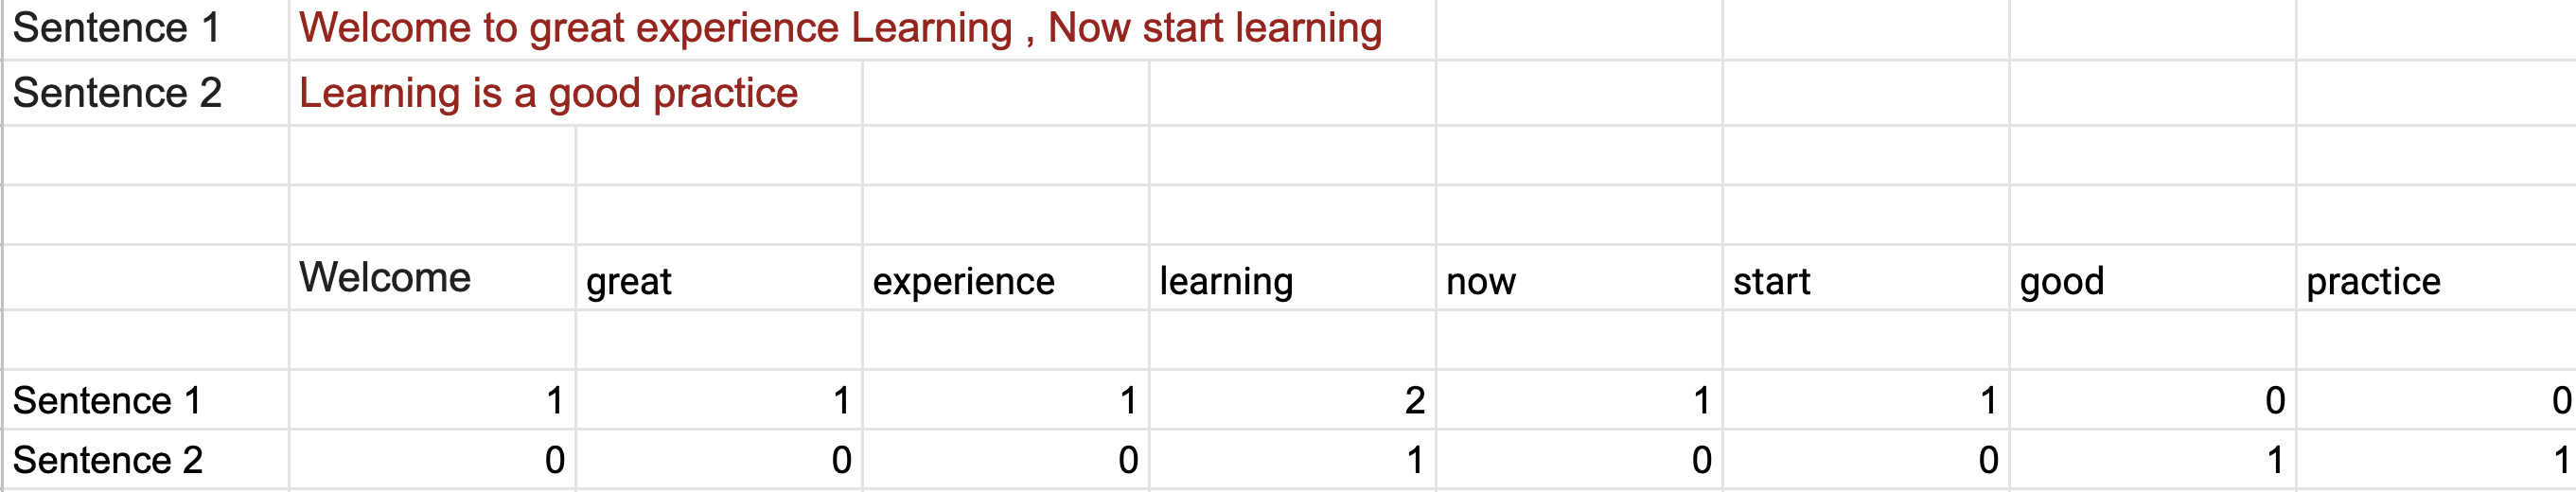

The scoring method we use here is to count the presence of each word and mark 0 for absence. This scoring method is used more generally.

In [ ]:
def vectorize(tokens):
    ''' This function takes list of words in a sentence as input 
    and returns a vector of size of filtered_vocab.It puts 0 if the 
    word is not present in tokens and count of token if present.'''
    vector=[]
    for w in filtered_vocab:
        vector.append(tokens.count(w))
    return vector
def unique(sequence):
    '''This functions returns a list in which the order remains 
    same and no item repeats.Using the set() function does not 
    preserve the original ordering,so i didnt use that instead'''
    seen = set()
    return [x for x in sequence if not (x in seen or seen.add(x))]
#create a list of stopwords.You can import stopwords from nltk too
stopwords=["to","is","a"]
#list of special characters.You can use regular expressions too
special_char=[",",":"," ",";",".","?"]
#Write the sentences in the corpus,in our case, just two 
string1="Welcome to great experience Learning , Now start learning"
string2="Learning is a good practice"
#convert them to lower case
string1=string1.lower()
string2=string2.lower()
#split the sentences into tokens
tokens1=string1.split()
tokens2=string2.split()
print(tokens1)
print(tokens2)
#create a vocabulary list
vocab=unique(tokens1+tokens2)
print(vocab)
#filter the vocabulary list
filtered_vocab=[]
for w in vocab: 
    if w not in stopwords and w not in special_char: 
        filtered_vocab.append(w)
print(filtered_vocab)
#convert sentences into vectords
vector1=vectorize(tokens1)
print(vector1)
vector2=vectorize(tokens2)
print(vector2)

['welcome', 'to', 'great', 'experience', 'learning', ',', 'now', 'start', 'learning']
['learning', 'is', 'a', 'good', 'practice']
['welcome', 'to', 'great', 'experience', 'learning', ',', 'now', 'start', 'is', 'a', 'good', 'practice']
['welcome', 'great', 'experience', 'learning', 'now', 'start', 'good', 'practice']
[1, 1, 1, 2, 1, 1, 0, 0]
[0, 0, 0, 1, 0, 0, 1, 1]


A problem with scoring word frequency is that highly frequent words start to dominate in the document (e.g. larger score), but may not contain as much “informational content” to the model as rarer but perhaps domain specific words.

One approach is to rescale the frequency of words by how often they appear in all documents, so that the scores for frequent words like “the” that are also frequent across all documents are penalized.

This approach to scoring is called Term Frequency – Inverse Document Frequency, or **TF-IDF** for short

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
 
sentence_1="This is a good job.I will not miss it for anything"
sentence_2="This is not good at all"
 
 
 
#without smooth IDF
print("Without Smoothing:")
#define tf-idf
tf_idf_vec = TfidfVectorizer(use_idf=True, 
                        smooth_idf=False,  
                        ngram_range=(1,1),stop_words='english') # to use only  bigrams ngram_range=(2,2)
#transform
tf_idf_data = tf_idf_vec.fit_transform([sentence_1,sentence_2])
 
#create dataframe
tf_idf_dataframe=pd.DataFrame(tf_idf_data.toarray(),columns=tf_idf_vec.get_feature_names())
print(tf_idf_dataframe)
print("\n")
 
#with smooth
tf_idf_vec_smooth = TfidfVectorizer(use_idf=True,  
                        smooth_idf=True,  
                        ngram_range=(1,1),stop_words='english')
 
 
tf_idf_data_smooth = tf_idf_vec_smooth.fit_transform([sentence_1,sentence_2])
 
print("With Smoothing:")
tf_idf_dataframe_smooth=pd.DataFrame(tf_idf_data_smooth.toarray(),columns=tf_idf_vec_smooth.get_feature_names())
print(tf_idf_dataframe_smooth)

Without Smoothing:
       good       job      miss
0  0.385372  0.652491  0.652491
1  1.000000  0.000000  0.000000


With Smoothing:
       good       job      miss
0  0.449436  0.631667  0.631667
1  1.000000  0.000000  0.000000


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
